# Project 3(4): NLP - Modeling

Done by: Richelle-Joy Chia, a Redditor-and-data-science enthusiast! 

Problem statement: Through natural language processing and classification models, how can we help Reddit and other interested parties classify posts based on the texts used by people who may be depressed or anxious? Furthermore, how can sentiment analysis be utilized to detect emotions associated with depression and anxiety?

In [1]:
# import libraries 

import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import seaborn as sns
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV # split our data and run hyperparameter search
from sklearn.pipeline import Pipeline # to compactly pack multiple modeling operations
from sklearn.naive_bayes import BernoulliNB, MultinomialNB # to build our classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to access results from binary classification task (you may also import other specific classification metrics)
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text module in sklearn.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

In [2]:
# import data 

data = pd.read_csv('../data.csv')

In [3]:
# drop rows that have been affected by transforming pd df to csv

data.dropna(axis=0, inplace=True)

## Model Preparation

### Train/test split

- This step is done to estimate the performance of a prediction-based algorithim when they are used to make predictions on data not used to train the model.

In [4]:
X = data['joined_new'] 
y = data['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=None,
                                                    stratify=y,
                                                    random_state=42)

In [6]:
# instantiate a CountVectorizer with the default hyperparameters

cvec = CountVectorizer(analyzer='word', stop_words = 'english', min_df = 3, max_df=.98, max_features=1000)


In [7]:
# fit the vectorizer on our corpus and transform it

X_train_vec = cvec.fit_transform(X_train)

In [8]:
X_train_vec

<22476x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 740968 stored elements in Compressed Sparse Row format>

In [9]:
# convert the sparse matrix into an array so that we can visualize it

print(X_train_vec.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [10]:
# recap the 1st row in X_train

print(X_train.iloc[0])

falling i hate it  month good  medication finally work  plans  ideas  sparkle  but come house people suck joy slowly falling again  i'm family month i affect me  i'm moving dorm september i'm stuck i'm afraid i've built break i forced fight start line again  i'm losing strength i feel lonely  please i need warmth motivation it 


In [11]:
# examine if CountVectorizer() worked? 

X_train_vec.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,

In [12]:
# using an in-built method to access feature column names (unique words) - all numbers! because our `message` texts had a lot of numbers (spam)
cvec.get_feature_names_out()[:10]

array(['ability', 'able', 'absolutely', 'abuse', 'abusive', 'accept',
       'accident', 'act', 'actual', 'actually'], dtype=object)

In [13]:
# printing random values in column index 1000 to 1005 - the 1000th column has words beginning with letter `a`
# .get_feature_names_out() gives us our unique word columns
cvec.get_feature_names_out()[1000:1005]

array([], dtype=object)

In [14]:
# print the words (forming the unique column headers) that are actually NON-ZERO values in the first row

for index, element in enumerate(X_train_vec.toarray()[0]): # iterate over both index, element (count value of a unique word)
    if element!=0:
        print(index, cvec.get_feature_names_out()[index])

14 affect
16 afraid
94 break
142 come
298 falling
299 family
305 feel
310 fight
313 finally
324 forced
361 good
393 hate
431 house
465 joy
503 line
515 lonely
523 losing
549 medication
576 month
581 motivation
585 moving
595 need
647 people
785 slowly
807 start
829 stuck
835 suck
935 ve
976 work


In [15]:
# transforming test using what we already fit on X_train

X_test = cvec.transform(X_test)

In [16]:
X_test.shape

(7493, 1000)

In [17]:
# examine if the datasets are balanced 

y_test.value_counts(normalize=True)

0    0.504871
1    0.495129
Name: subreddit, dtype: float64

In [18]:
# recap what's in our X (texts) and y (mapped response)
print(X[:5], y[:5])

0                                                                                                                                                                                                                aching chest stomach tiredness i just tired time moment  i fair chest ache pain abdomen making think oh god i’ve got horrible illness starting c  doe experience similar term ache pain tiredness  
1    very cold hand foot anxious hey  i problem quite time  it started   year ago  i just got depressed  stressed tired  bored life  thinking existential thing such  half year ago i quite strong panic attack i better circumstance i don't anymore  i anxious time week  slight manageable  and i year i panic attack  anxious i cold hand feet  i life  life i active working     time week       age range  ...
2                                                                                                                                              feeling lost sensation i feeling like i’m losin

/var/folders/_h/y5c9n2xs6qj32b1f_mr0b0ch0000gn/T/ipykernel_11430/1835007449.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(X[:5], y[:5])


In [19]:
# redefine training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=None,
                                                    stratify=y,
                                                    random_state=42)

## Model 1 (Baseline) - CountVectorizer and Logistic Regression

- My baseline model includes CV and LogReg. For this and subsequent models, I will be using the accuracy scores and confusion matrix as the metrics for finding the best model. 

In [20]:
# instantiate a pipeline class with the following 2 as its list items:
# 1. CountVectorizer (transformer)
# 2. Logistic Reg

pipe = Pipeline([
    ('cvec', CountVectorizer()), # tuple for transformer object, class
    ('lr', LogisticRegression(max_iter=10000)) # tuple for estimator object, class   
])

In [21]:
# include parameters for pipe 

pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2), (2,3)] 
} # standard param dict definition for GridSearch CV

In [22]:
# instantiate GridSearchCV

gs = GridSearchCV(pipe, # the object that we are optimizing
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [23]:
# fit GridSearch to training data
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2), (2, 3)]})

In [62]:
# check to see which hyperparameter combination yielded the best result

gs.best_params_ 

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}

In [24]:
print('best score:', gs.best_score_)
print('model score on training set:', gs.score(X_train, y_train))
print('model score on training set:', gs.score(X_test, y_test))

best score: 0.8482381471702446
model score on training set: 0.9323278163374266
model score on training set: 0.8506606165754704


In [25]:
# get predictions
preds = gs.predict(X_test)
print(preds)

[0 1 0 ... 0 1 1]


In [26]:
# confusion matrix yields a 2-D array
confusion_matrix(y_test, preds) 

array([[3121,  662],
       [ 457, 3253]])

In [27]:
# ravel() to convert to 1-D and Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(tn, fp, fn, tp)

3121 662 457 3253


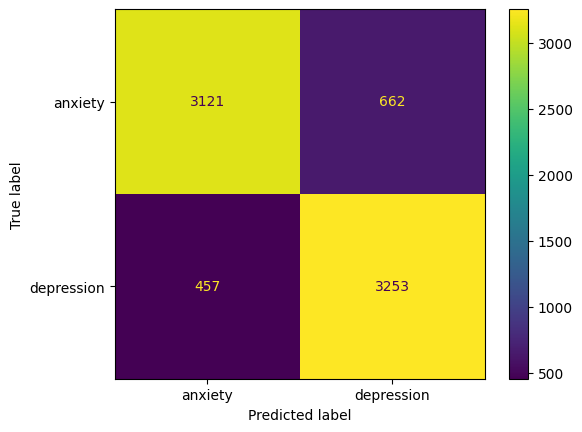

In [28]:
# plot confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['anxiety', 'depression'])
disp.plot();

Out of 7493 cases, there are 457 cases that were supposed to be labelled as depression but was wrongly labelled as anxiety. There are 662 cases that were supposed to be labelled as anxiety but was wrongly labelled as depression.

Overall, the base model accurately classified 93.23% of the training dataset but only classified 84.82% of the test dataset, which implies that the model is highly overfit. As such, I will be running a few different models below to see which provides the best results.

## Model 2: CountVectorizer and BernoulliNB

In [29]:
# instantiate a pipeline class with the following 2 as its list items:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()), # tuple for transformer object, class
    ('Bnb', BernoulliNB()) # tuple for estimator object, class   
])

In [30]:
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000], # start with CountVectorizer() class' object cvec__CountVectorizer()'s hyperparameter
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)] # test unigram only (1,1) and unigram+bigram (1,2)
} # standard param dict definition for GridSearch CV

In [31]:
# instantiate GridSearchCV.

gs = GridSearchCV(pipe, # the object that we are optimizing
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [32]:
# fit GridSearch to training data
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('Bnb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [61]:
# check to see which hyperparameter combination yielded the best result

gs.best_params_ 

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}

In [33]:
print('best score:', gs.best_score_)
print('model score on training set:', gs.score(X_train, y_train))
print('model score on training set:', gs.score(X_test, y_test))

best score: 0.8315532580684746
model score on training set: 0.8412528919736608
model score on training set: 0.829841185106099


In [34]:
# get predictions
preds = gs.predict(X_test)
print(preds)

[0 1 0 ... 0 1 1]


In [35]:
# confusion matrix yields a 2-D array
confusion_matrix(y_test, preds) 

array([[2841,  942],
       [ 333, 3377]])

In [36]:
# ravel() to convert to 1-D and Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(tn, fp, fn, tp)

2841 942 333 3377


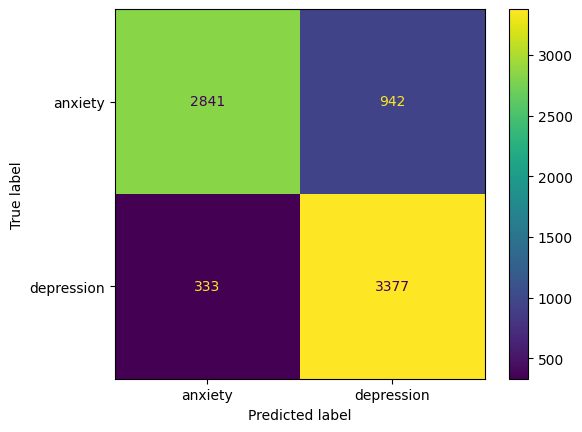

In [37]:
# plot confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['anxiety', 'depression'])
disp.plot();

Out of 7493 cases, there are 333 cases that were supposed to be labelled as depression but was wrongly labelled as anxiety. There are 942 cases that were supposed to be labelled as anxiety but was wrongly labelled as depression.

Overall, this model accurately classified 84.13% of the training dataset and accurately classified 82.98% of the test dataset, which is a better model than the baseline. However, I will be exploring two more models with term frequency-inverse document frequency (TF-IDF) instead of CV. 

## Model 3: Term Frequency–Inverse Document Frequency (TFIDF) and MultinomialNB

In [38]:
# set up a pipeline with tf-idf vectorizer and multinomial naive bayes

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()), # this is the old change vs our previous GridSearch done with CountVectorizer()
    ('nb', MultinomialNB())
])

In [39]:
# parameters for pipeline

pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'], # let's try both with and without stopwords
    'tvec__ngram_range': [(1,1), (1,2)] # let's try both unigrams and uni+bi-grams
}

In [40]:
# instantiate GridSearchCV.
gs_tvec = GridSearchCV(pipe_tvec, # what object are we optimizing?
                        param_grid = pipe_tvec_params, # what parameters values are we searching?
                        cv=5, n_jobs=-1) # 5-fold cross-validation. n_jobs=-1 will do GridSearch using all cores in our CPU to accelerate the search

In [41]:
# fit GridSearch to training data

gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [42]:
# check to see which hyperparameter combination yielded the best result

gs_tvec.best_params_ 

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': None}

In [43]:
print('best score:', gs_tvec.best_score_)
print('model score on training set:', gs_tvec.score(X_train, y_train))
print('model score on training set:', gs_tvec.score(X_test, y_test))

best score: 0.8293288707500228
model score on training set: 0.8456130984160882
model score on training set: 0.8297077272120645


In [44]:
# get predictions
y_pred = gs_tvec.predict(X_test)

# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

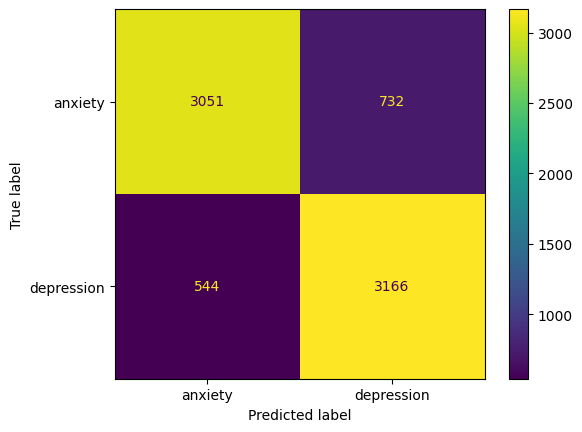

In [45]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['anxiety', 'depression'])
disp.plot();

Out of 7493 cases, there are 544 cases that were supposed to be labelled as depression but was wrongly labelled as anxiety. There are 732 cases that were supposed to be labelled as anxiety but was wrongly labelled as depression.

Overall, this third model accurately classified 84.56% of the training dataset and accurately classified 82.97% of the test dataset, which is quite similar to model 2. The fourth model includes the usage of the Random Forest classifier after the data has been fit through TF-IDF.

## Model 4: TFIDF and Random Forest Classifier 

In [54]:
# instantiate model

rf = RandomForestClassifier() 
et = ExtraTreesClassifier() 

In [49]:
pipe = Pipeline([
                ('tf', TfidfVectorizer()),
                ('rf', RandomForestClassifier(random_state = 42))
])

In [50]:
%%time

parameters = {
    'rf__n_estimators':[100, 150, 200],
    'rf__max_depth': [5, 7],
}

rscv = RandomizedSearchCV(pipe, 
                        param_distributions = parameters, 
                        return_train_score = True,
                        n_iter = 50,
                        cv = 3
                         )


CPU times: user 34 µs, sys: 102 µs, total: 136 µs
Wall time: 22.9 µs


In [51]:
rscv.fit(X_train, y_train)

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50,
                   param_distributions={'rf__max_depth': [5, 7],
                                        'rf__n_estimators': [100, 150, 200]},
                   return_train_score=True)

In [52]:
rscv.best_params_

{'rf__n_estimators': 200, 'rf__max_depth': 7}

In [53]:
rscv_train_accuracy = round(rscv.score(X_train, y_train),3)
rscv_test_accuracy = round(rscv.score(X_test, y_test),3)

print(f'Train Accuracy: {rscv_train_accuracy}')
print(f'Test Accuracy: {rscv_test_accuracy}')

Train Accuracy: 0.857
Test Accuracy: 0.838


In [57]:
# get predictions
y_pred = rscv.predict(X_test)

# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

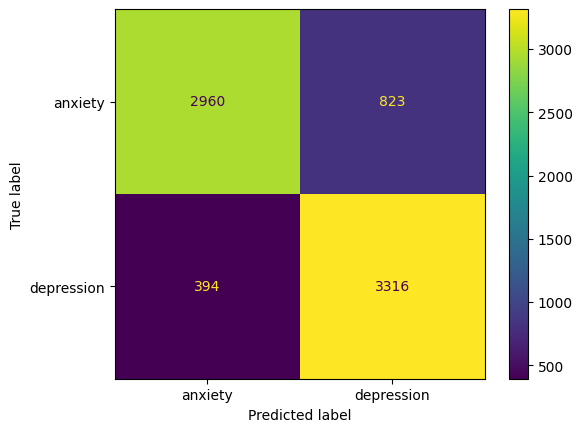

In [58]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['anxiety', 'depression'])
disp.plot();

Out of 7493 cases, there are 394 cases that were supposed to be labelled as depression but was wrongly labelled as anxiety. There are 832 cases that were supposed to be labelled as anxiety but was wrongly labelled as depression.

Overall, this final model accurately classified 85.70% of the training dataset and accurately classified 83.80% of the test dataset, which is the best scoring model. 

### Summary of the train-test scores

The best model is Model 4 (TFIDF and Random Forest Classifier) with a test score of .838. 

| Model      | Train score | Test score |
|------------|-------------|------------|
| CV and Logistic Regression (Baseline)   | .932        | .850       |
| CV and BernoulliNB      | .841        | .829       |
| TFIDF and MultinomialNB  | .845        | .829       |
| TFIDF and Random Forest Classifier  | .857        | .838       |

## Now, let's take a look at the sentiment analysis in the subsequent notebooks. 